<a href="https://colab.research.google.com/github/LokeshJatangi/EVA-vision/blob/master/Project%206/Assignment%206A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing modules and libraries


In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


## Loading Cifar 10 dataset

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


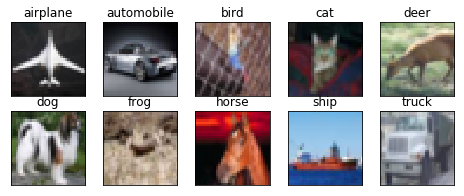

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Model of Neural Architecture


>_Convolution Block 1 Begins_   
**32x32x3  | (3x3x3)x48 | 32x32x48   , Receptive Field = 2x2**  
**32x32x48 | (3x3x48)x10 | 30x30x48   , Receptive Field = 4x4**  
>_Convolution Block 1 Ends_
*** 
>_Transitional Block  Begins_  
**Max Pooling  (2x2)   | 15x15x48            , Receptive Field = 8x8**  
**15x15x48 | (1x1x48)x24 | 15x15x24   , Receptive Field = 8x8**  
>_Transitional Block  Ends_
***  
>_Convolution Block 2 Begins_  
**15x15x24 | (3x3x24)x48 | 13x13x48     , Receptive Field = 10x10**  
**13x13x48   | (3x3x48)x96 | 13x13x96     , Receptive Field = 12x12**  
**13x13x96   | (3x3x96)x192 | 11x11x192     , Receptive Field = 14x14**  
>_Convolution Block 2 Ends_ 
***
>_Transitional Layer Begins_  
**Max Pooling  (2x2)   | 5x5x192            , Receptive Field = 28x28**  
**5x5x192   | (1x1x192)x48  | 5x5x48    , Receptive Field = 28x28**  
>_Transitional Layer Ends_  
***
>_Convolution Block 3 Begins_  
**5x5x48 | (3x3x48)x96 | 5x5x96     , Receptive Field = 30x30**  
**5x5x96   | (3x3x48)x192 | 3x3x192     , Receptive Field = 32x32**  
**3x3x192   | (3x3x192)x384 | 1x1x384     , Receptive Field = 34x34**  
>_Convolution Block 3 Ends_ 

*** 

## Model Architecture

In [7]:
# Define the model
model = Sequential()

# Convolution Block 1 
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #Output = (32x32x48) , RF= 2x2
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(48, 3, 3))#Output = (30x30x48) , RF= 4x4
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))                      # Convolution Block 1 ends

# Max Pooling 
model.add(MaxPooling2D(pool_size=(2, 2)))# Output = (15x15x48) ,RF = 8x8

# Transistion layer
model.add(Convolution2D(24,1,1))# Output = (15x15x24) ,RF = 8x8
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Convolution Block 2 
model.add(Convolution2D(48,3,3))# Output = (13x13x48) ,RF = 10x10
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(96, 3, 3, border_mode='same'))# Output = (13x13x96) ,RF = 12x12
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(192, 3, 3))# Output = (11x11x192) ,RF = 14x14
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))                   # Convolution Block 2 ends


# MaxPoolin layer
model.add(MaxPooling2D(pool_size=(2, 2)))# Output = (5x5x192) ,RF = 28x28

# Transition Layer 
model.add(Convolution2D(48,1,1))# Output = (5x5x48) ,RF = 28x28
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


# Convolution block 3 
model.add(Convolution2D(96, 3, 3, border_mode='same'))# Output = (5x5x96) ,RF = 30x30
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(192, 3, 3))# Output = (3x3x192) ,RF = 32x32
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(384, 3, 3))# Output = (1x1x384) ,RF = 34x34
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))                      # Convolution Block 3 ends

# Bigger kernel 
model.add(Convolution2D(10, 1,1))
model.add(Flatten())

model.add (Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0622 14:27:15.584239 140166793648000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
W0622 14:27:15.633215 140166793648000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0622 14:27:15.639799 140166793648000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0622 14:27:15.692354 140166793648000 deprecation_wrapper

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 48)        192       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=80)`
  if sys.path[0] == '':
W0622 14:27:20.621701 140166793648000 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will

Epoch 1/80
390/390 [==============================] - 43s 111ms/step - loss: 1.7357 - acc: 0.4042 - val_loss: 1.9831 - val_acc: 0.3899
Epoch 2/80
390/390 [==============================] - 39s 99ms/step - loss: 1.2306 - acc: 0.5649 - val_loss: 1.2799 - val_acc: 0.5671
Epoch 3/80
390/390 [==============================] - 38s 99ms/step - loss: 1.0104 - acc: 0.6430 - val_loss: 0.9640 - val_acc: 0.6692
Epoch 4/80
390/390 [==============================] - 38s 98ms/step - loss: 0.8585 - acc: 0.6959 - val_loss: 1.0159 - val_acc: 0.6555
Epoch 5/80
390/390 [==============================] - 39s 99ms/step - loss: 0.7719 - acc: 0.7288 - val_loss: 0.8681 - val_acc: 0.6978
Epoch 6/80
390/390 [==============================] - 38s 98ms/step - loss: 0.7080 - acc: 0.7526 - val_loss: 0.7730 - val_acc: 0.7333
Epoch 7/80
390/390 [==============================] - 38s 98ms/step - loss: 0.6556 - acc: 0.7697 - val_loss: 0.7467 - val_acc: 0.7504
Epoch 8/80
390/390 [==============================] - 38s 98m

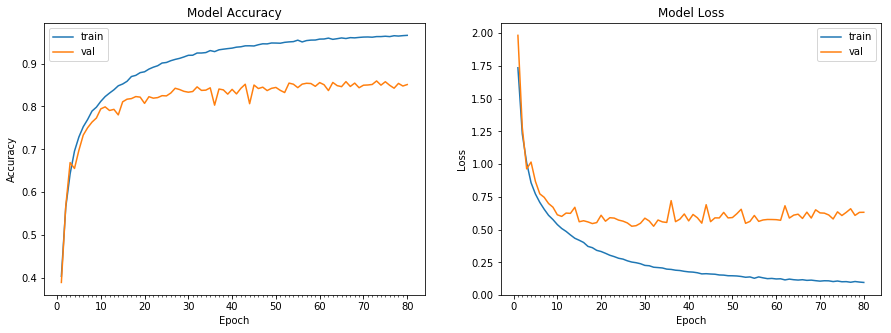

Accuracy on test data is: 85.10


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 80, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

The base accuracy for the model was **83.52** .

The accuracy obtained after removing dense layers and adding layers is **85.53** at 59th epoch.